In [2]:
import torch
from torch import nn

import torch.utils.data
import torchvision.datasets
import torchvision.transforms

from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
dataset = torchvision.datasets.MNIST(root="~/pytorch/data", train=True, download=True, transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(dataloader)
images, labels = next(dataiter)
print(torch.max(images), torch.min(images))

tensor(1.) tensor(0.)


In [5]:
class Autoencoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) # -> N, 3
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [6]:
model = Autoencoder_Linear()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [10]:
epochs = 10
output = []
for epoch in tqdm(range(epochs), desc="Epochs", position=0):
    for image, label in (pbar := tqdm(dataloader, position=1, leave=False)):
        image = image.reshape(-1, 28 * 28)
        reconstructed = model(image)
        loss = loss_function(reconstructed, image)
        
        pbar.set_description(f"Loss: {loss:.4f}")

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    output.append((epoch, image, reconstructed))

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

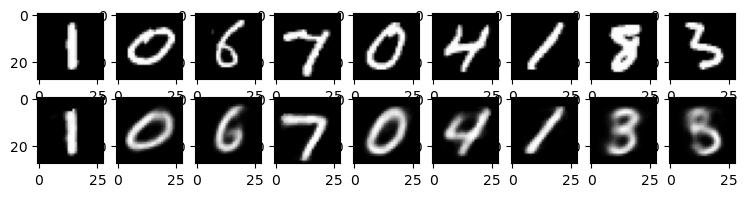

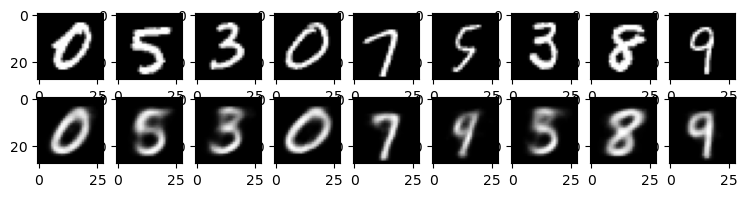

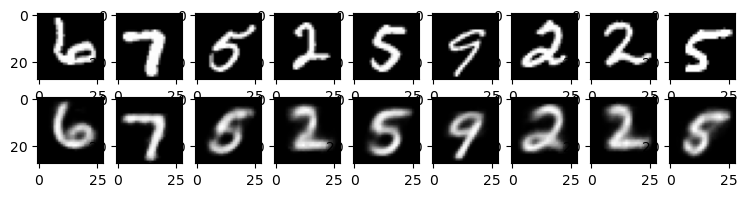

In [11]:
for k in range(0, epoch, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    
    imgs = output[k][1].detach().numpy()
    recon = output[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
